# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

display(heroes_df.head(), powers_df.head())


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
try:
    heroes_df = heroes_df.drop('Unnamed: 0', axis=1)
except:
    print('already dropped')
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
heroes_df.info()
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

Strategy - use isna() to identify any pure na values.  Next, inspect numerical columns using valuecounts to see if there are any overly common/unexpected values.
Finally, use unique on remaining columns to see if there are any non-na but still missing or placeholder values.

Once they are identified, find frequency of na values and replace or remove as appropriate (as described below).


NB: Also, we should probably check for duplicated values at some point.

In [5]:
display(heroes_df.isna().any(),
        powers_df.isna().any())

#display(powers_df.isna().sum().loc[True]) #this brings a key error so there are no na's
display(heroes_df.isna().value_counts())
display(powers_df.isna().sum().value_counts())

#So, it appears that Publisher, and Weight have some na values.  
#I want to inspect alignment and skin color as well since they have two false outputs.

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
                         ...  
Phoenix Force            False
Molecular Dissipation    False
Vision - Cryo            False
Omnipresent              False
Omniscient               False
Length: 168, dtype: bool

name   Gender  Eye color  Race   Hair color  Height  Publisher  Skin color  Alignment  Weight
False  False   False      False  False       False   False      False       False      False     719
                                                     True       False       False      False      13
                                                                                       True        2
dtype: int64

0    168
dtype: int64

In [6]:
#heroes_df fixes
display(heroes_df.isna().value_counts())
for col in ['Publisher','Weight' ]:
    print('Values for {}:\n{}\n\n'.format(col, heroes_df[col].unique()))
    
#After this inspection, we see that there are nan's in Publisher and -99s in Weight.  We should also inspect other numerical 
#columns, in this case just Height, for placeholders

display('height value counts:',heroes_df.Height.value_counts())

#So we see that Height also has -99 placeholders


heroes_df.Publisher.value_counts(normalize=True)
heroes_df.loc[heroes_df['Publisher'].isna()]
print('Publisher NaNs:', len(heroes_df.loc[heroes_df['Publisher'].isna()]))
#There are 15 nan values.  They are all associated with characters that generally are associated with other mediums.  
#Note they often also have a -99 weight...so we may kill two birds with one stone.  I'm inclined to remove them so far.

#inspecting Weight values
heroes_df.Weight.value_counts(normalize=True)
#32% of characters have a placeholder weight!!!
#We shouldn't drop these rows.  But enough characters do have a weight that I don't want to drop the column either.
#So, I'll replace the na's with the median value.
#in addition, there are nan's here too
display("Weight NaNs:", heroes_df.Weight.isna().sum())
#it seems just 2 of them

#So, let's just drop all NaN rows from the table.
heroes_df.dropna(inplace=True)
display('After dropping NaNs:', heroes_df.Publisher.unique())

h_weight_no_placeholders = heroes_df.Weight[heroes_df.Weight != -99.]
display(h_weight_no_placeholders)
display(h_weight_no_placeholders[h_weight_no_placeholders.isna()])
h_weight_no_placeholders = h_weight_no_placeholders[h_weight_no_placeholders.isna()==False]
display('Weight NaNs after drop:',
        h_weight_no_placeholders[h_weight_no_placeholders.isna()].sum()) #so we've removed -99s and NaNs
weight_median = h_weight_no_placeholders.median()

def impute_weight(value):
    if value == -99:
        return weight_median
    else:
        return value
heroes_df.Weight = heroes_df['Weight'].map(lambda x: impute_weight(x))
heroes_df.Weight.apply(['mean', 'median', 'std'])
heroes_df.Weight.value_counts()

#ultimately, this makes a huge peak at the median value, but doesn't skew data or lose data.

#we give similar treatment to height
h_height_no_placeholders = heroes_df.Height[heroes_df.Height != -99.]
#display(h_height_no_placeholders)
#display(h_height_no_placeholders[h_height_no_placeholders.isna()])
h_height_no_placeholders = h_height_no_placeholders[h_height_no_placeholders.isna()==False]
#display('height NaNs after drop:',
#        h_height_no_placeholders[h_height_no_placeholders.isna()].sum()) #so we've removed -99s and NaNs
height_median = h_height_no_placeholders.median()
def impute_height(value):
    if value == -99:
        return height_median
    else:
        return value
heroes_df.Height = heroes_df['Height'].map(lambda x: impute_height(x))

#reminder: check for duplicated values
#there are duplicates, but we weren't yet asked to remove them so I will leave them.
heroes_df[heroes_df.duplicated()]
heroes_df.loc[heroes_df['name']=='Goliath']

name   Gender  Eye color  Race   Hair color  Height  Publisher  Skin color  Alignment  Weight
False  False   False      False  False       False   False      False       False      False     719
                                                     True       False       False      False      13
                                                                                       True        2
dtype: int64

Values for Publisher:
['Marvel Comics' 'Dark Horse Comics' 'DC Comics' 'NBC - Heroes'
 'Wildstorm' 'Image Comics' nan 'Icon Comics' 'SyFy' 'Hanna-Barbera'
 'George Lucas' 'Team Epic TV' 'South Park' 'HarperCollins' 'ABC Studios'
 'Universal Studios' 'Star Trek' 'IDW Publishing' 'Shueisha'
 'Sony Pictures' 'J. K. Rowling' 'Titan Books' 'Rebellion' 'Microsoft'
 'J. R. R. Tolkien']


Values for Weight:
[441.  65.  90. -99. 122.  88.  61.  81. 104. 108.  72. 169. 173. 101.
  68.  57.  54.  83.  86. 358. 135. 106. 146.  63.  98. 270.  59.  50.
 126.  67. 180.  77.  52.  95.  79. 133. 181. 216.  71. 124. 155. 113.
  58.  92.  97.  56. 230. 495.  55. 110.  99. 158.  74. 116.  62. 170.
  70.  78. 225. 817.  27.  91. 178. 383. 171. 187. 132.  89. 412. 306.
  80. 203.  96.  18.  45. 167.  16. 630. 268.  nan 115.   4.  48. 119.
 207. 191.   2.  14.  49. 855. 356. 324. 360. 288. 236.  36. 140. 128.
 338. 248. 125.  85. 293.  69. 405. 117.  87. 234. 320.  38.  25. 900.
 310. 149. 315. 153. 437. 131

'height value counts:'

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
 185.0     35
 175.0     34
 168.0     29
 170.0     26
 165.0     26
 191.0     21
 193.0     21
 198.0     18
 173.0     17
 201.0     11
 196.0     11
 163.0      8
 213.0      7
 203.0      5
 211.0      5
 157.0      5
 244.0      4
 229.0      3
 155.0      3
 218.0      3
 226.0      3
 122.0      2
 206.0      2
 279.0      2
 366.0      2
 137.0      2
 30.5       2
 305.0      2
 61.0       1
 975.0      1
 142.0      1
 287.0      1
 267.0      1
 304.8      1
 701.0      1
 876.0      1
 259.0      1
 15.2       1
 297.0      1
 257.0      1
 62.5       1
 66.0       1
 160.0      1
 140.0      1
 234.0      1
 71.0       1
 79.0       1
 108.0      1
 64.0       1
Name: Height, dtype: int64

Publisher NaNs: 15


'Weight NaNs:'

2

'After dropping NaNs:'

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

0      441.0
1       65.0
2       90.0
3      441.0
5      122.0
       ...  
728     83.0
729     52.0
731     17.0
732     57.0
733     81.0
Name: Weight, Length: 494, dtype: float64

Series([], Name: Weight, dtype: float64)

'Weight NaNs after drop:'

0.0

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
289,Goliath,Male,-,-,-,183.0,Marvel Comics,-,good,81.0
290,Goliath,Male,-,Human,-,183.0,Marvel Comics,-,good,81.0
291,Goliath,Male,-,Human,-,183.0,Marvel Comics,-,good,81.0


In [7]:
#powers_df fixes

#display(powers_df.isna().value_counts())
powers_df.columns
#for col in powers_df.columns:
#    print(col)

for col in powers_df.columns :
    for val in powers_df[col].unique():
        if val not in [False, True]:
            print('Values for {}:\n{}\n\n'.format(col, powers_df[col].unique()))
            break
            
#So, there are no values except True and False in columns, except for hero_names.

powers_df.hero_names.isna().sum()
#and there are no na values in the list of hero names.  
#we can check duplicates.
powers_df[powers_df.duplicated()]
#appears to be no repeated rows

Values for hero_names:
['3-D Man' 'A-Bomb' 'Abe Sapien' 'Abin Sur' 'Abomination' 'Abraxas'
 'Absorbing Man' 'Adam Monroe' 'Adam Strange' 'Agent Bob' 'Agent Zero'
 'Air-Walker' 'Ajax' 'Alan Scott' 'Alex Mercer' 'Alex Woolsly' 'Alien'
 'Allan Quatermain' 'Amazo' 'Ammo' 'Ando Masahashi' 'Angel' 'Angel Dust'
 'Angel Salvadore' 'Angela' 'Animal Man' 'Annihilus' 'Ant-Man'
 'Ant-Man II' 'Anti-Monitor' 'Anti-Spawn' 'Anti-Venom' 'Apocalypse'
 'Aquababy' 'Aqualad' 'Aquaman' 'Arachne' 'Archangel' 'Arclight' 'Ardina'
 'Ares' 'Ariel' 'Armor' 'Astro Boy' 'Atlas' 'Atom' 'Atom Girl' 'Atom II'
 'Atom III' 'Atom IV' 'Aurora' 'Azazel' 'Azrael' 'Aztar' 'Bananaman'
 'Bane' 'Banshee' 'Bantam' 'Batgirl' 'Batgirl IV' 'Batgirl VI' 'Batman'
 'Batman II' 'Battlestar' 'Batwoman V' 'Beak' 'Beast' 'Beast Boy' 'Ben 10'
 'Beta Ray Bill' 'Beyonder' 'Big Barda' 'Big Daddy' 'Big Man'
 'Bill Harken' 'Billy Kincaid' 'Binary' 'Bionic Woman' 'Bird-Brain'
 'Bird-Man' 'Bird-Man II' 'Birdman' 'Bishop' 'Bizarro' 'Bizarro-Girl'


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [8]:
try:
    heroes_df.set_index('name',inplace=False)
    powers_df.set_index('hero_names', inplace=False)
except:
    print('Index already changed')

joined_df = heroes_df.join(powers_df, how='outer', rsuffix='_powers_df')
display(joined_df.head())

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0,...,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Manipulating Pandas plot objects in matplotlib')

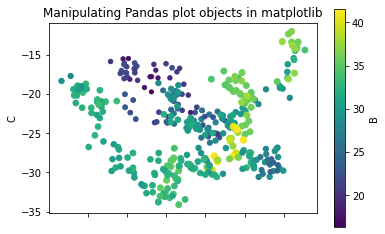

In [9]:
np.random.seed
data = pd.DataFrame({'A':np.random.randn(365).cumsum(),
                    'B':np.random.randn(365).cumsum() + 25,
                    'C':np.random.randn(365).cumsum() - 25}, 
                     index = pd.date_range('1/1/2018', periods = 365))
ax = data.plot.scatter('A', 'C', 
                        c = 'B',
                        s = data['B'],
                        colormap = 'viridis');
ax.set_aspect('equal')
ax.set_title('Manipulating Pandas plot objects in matplotlib')

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

Text(0.5, 1.0, 'Height vs. Weight for Heroes, colored by Gender')

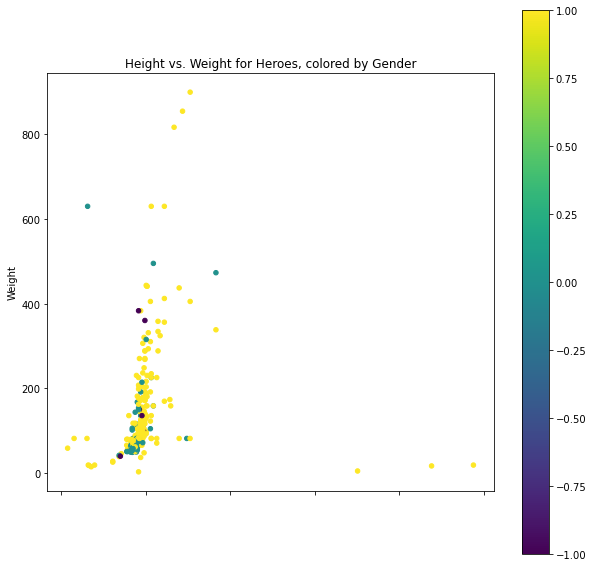

In [10]:
male_df = joined_df[joined_df.Gender=='Male']
female_df = joined_df[joined_df.Gender=='Female']

#pd.plotting.scatter_matrix(female_df, figsize=(10,10));

# ax = data.plot.scatter('A', 'C', 
#                         c = 'B',
#                         s = data['B'],
#                         colormap = 'viridis');
# ax.set_aspect('equal')
# ax.set_title('Manipulating Pandas plot objects in matplotlib')
ax = joined_df.plot.scatter('Height','Weight',
                            c = joined_df.Gender.map(lambda x:  1 if x == 'Male' else (0 if x == 'Female' else -1)), 
                            #s = 'Gender', 
                            colormap = 'viridis', 
                           figsize = (10,10))
ax.set_aspect('equal')
ax.set_title('Height vs. Weight for Heroes, colored by Gender')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

C:\Users\erict\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


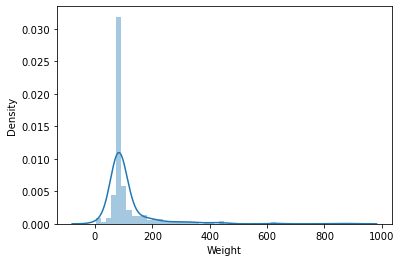

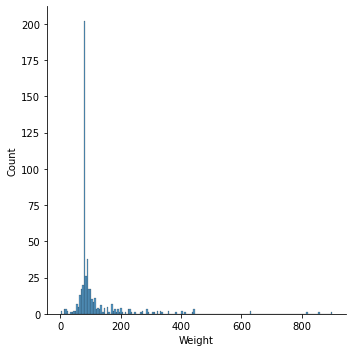

In [11]:
#this instruction seems very confusing, since it seems we were asked to do this same thing in the last step, but then 
#we didn't use it...
#and even now, we are asked to slice, but then write a flexible show_distplot function...

import seaborn as sns 

male_heroes_df = joined_df[joined_df.Gender=='Male']
female_heroes_df = joined_df[joined_df.Gender=='Female']

def show_distplot(dataframe, gender, column_name):
    #Seaborn documentation shows distplot is deprecated...I will write one using the new function too
    #seaborn.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)
    df = dataframe[joined_df.Gender == gender]
    col = df[column_name]
    sns.distplot(a=col, 
                #norm_hist=True,
                #axlabel=None, 
                #label='Weight Density', 
                #ax=None, 
                #x=None
                )
    #return col

def show_displot(dataframe, gender, column_name):
    df = dataframe[joined_df.Gender == gender]
    col = df[column_name]
    sns.displot(data=col, 
                ##kind=['hist','kde']
                )

#testing:
show_distplot(joined_df, 'Male', 'Weight')
show_displot(joined_df, 'Male', 'Weight')

C:\Users\erict\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


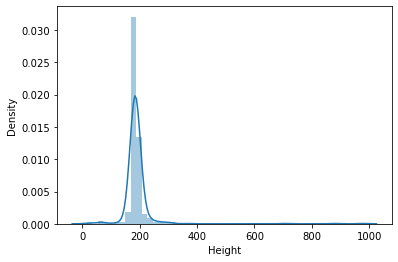

In [12]:
# Male Height
show_distplot(joined_df, 'Male', 'Height')

C:\Users\erict\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


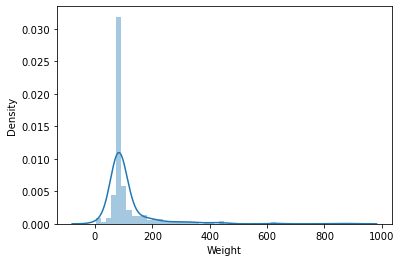

In [13]:
# Male Weight
show_distplot(joined_df, 'Male', 'Weight')

C:\Users\erict\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


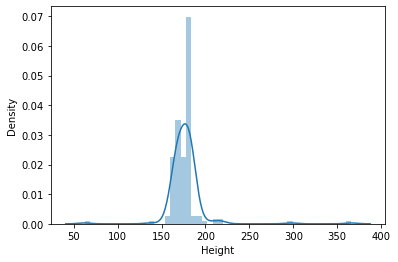

In [14]:
# Female Height
show_distplot(joined_df, 'Female', 'Height')

C:\Users\erict\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


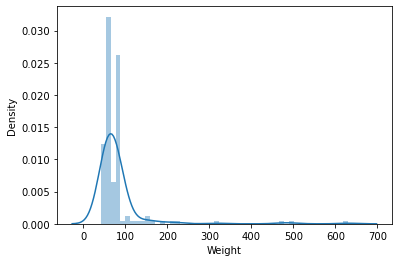

In [15]:
# Female Weight
show_distplot(joined_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

Now the choice to fill in all -99s with the overall median seems insufficient - there is a spike at the median which is inflated in one subset and deflated in the other.  
In any case, each distribution seems to have a higher density of values around the median, with lower density of values at the extremes, with a tail going toward high values.  Generally, a shape like a Poisson distribution with lambda around 4, for example.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [16]:
powercols=joined_df.columns[11:]
#display("AllHeroesDF:", type(joined_df))
power_counts={}
for col in powercols:
    grouped = joined_df.groupby([col])
    #print(grouped[col].count())
    power_counts[col]=grouped[col].count()[True]
sort_power_counts = sorted(power_counts.items(), key=lambda x: x[1], reverse=True)
print("The 5 most common powers overall are:")
sort_power_counts[:5]
#joined_df


The 5 most common powers overall are:


[('Super Strength', 360),
 ('Stamina', 289),
 ('Durability', 257),
 ('Super Speed', 249),
 ('Agility', 242)]

In [17]:
powercols=joined_df.columns[11:]
pub='Marvel Comics'
#display("AllHeroesDF:", type(joined_df))
power_counts={}
for col in powercols:
    try:
        grouped = joined_df.groupby([col, 'Publisher'])
        #grouped = joined_df.groupby([col])[col]
        #grouped = joined_df.groupby([col,'Publisher'])[(col,pub)]
        #print(grouped.count())
        #print(col,'count:',grouped[col].count()[True][pub])
        #print(grouped[(col,'Publisher')].count())
        #print(grouped[(col,'Publisher')].count())
        power_counts[col]=grouped[col].count()[True][pub]
    except:
        power_counts[col]=0
msort_power_counts = sorted(power_counts.items(), key=lambda x: x[1], reverse=True)
print("The 5 most common powers in {} are:".format(pub))
msort_power_counts[:5]

The 5 most common powers in Marvel Comics are:


[('Super Strength', 194),
 ('Stamina', 142),
 ('Durability', 138),
 ('Super Speed', 131),
 ('Agility', 113)]

In [18]:
powercols=joined_df.columns[11:]
pub='DC Comics'
#display("AllHeroesDF:", type(joined_df))
power_counts={}
for col in powercols:
    try:
        grouped = joined_df.groupby([col, 'Publisher'])
        #grouped = joined_df.groupby([col])[col]
        #grouped = joined_df.groupby([col,'Publisher'])[(col,pub)]
        #print(grouped.count())
        #print(col,'count:',grouped[col].count()[True][pub])
        #print(grouped[(col,'Publisher')].count())
        #print(grouped[(col,'Publisher')].count())
        power_counts[col]=grouped[col].count()[True][pub]
    except:
        power_counts[col]=0
dcsort_power_counts = sorted(power_counts.items(), key=lambda x: x[1], reverse=True)
print("The 5 most common powers in {} are:".format(pub))
dcsort_power_counts[:5]

The 5 most common powers in DC Comics are:


[('Super Strength', 97),
 ('Stamina', 91),
 ('Agility', 81),
 ('Durability', 76),
 ('Super Speed', 75)]

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
It appears the top 5 are the same in each of Marvel and DC, just in slightly different order!

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [19]:
#Before reading the sample questions, I was inclined to investigate co-occurence of powers in a hero.  To make it different 
#from the example just a little, I will check out whether it differs by alien-ness.


In [41]:
co_d = {} #this is the dictionary of co-occurence
for col in  powercols:
    for row in powercols:
        if col == row:
            break
        group = joined_df.groupby([col, row])
        
        #power_counts[col]=grouped[col].count()[True]
        try:
            co_d [(col, row)] = group[col].count()[True][True]
            #co_d [(col, row)] = group[col][row].count()[True]
            #display(group[col][row].count())
        except:
            pass
#group[col].count()[True][True]

try:
    display(co_d['Lantern Power Ring', 'Agility'])
except:
    print('oops1')
try:
    display(co_d['Agility', 'Lantern Power Ring' ])
except:
    print('oops2')


5

oops2


In [42]:
sort_cooccurence = sorted(co_d.items(), key=lambda x: x[1], reverse=True)
show_n = 20
print("The {} most common pairs of powers in {} are:".format(show_n,'Comics'))
sort_cooccurence[:show_n]

The 20 most common pairs of powers in Comics are:


[(('Super Strength', 'Durability'), 227),
 (('Stamina', 'Super Strength'), 221),
 (('Super Speed', 'Super Strength'), 219),
 (('Stamina', 'Agility'), 178),
 (('Super Speed', 'Stamina'), 171),
 (('Super Strength', 'Agility'), 168),
 (('Stamina', 'Durability'), 163),
 (('Super Strength', 'Flight'), 147),
 (('Super Speed', 'Durability'), 144),
 (('Super Strength', 'Accelerated Healing'), 143),
 (('Super Speed', 'Agility'), 142),
 (('Reflexes', 'Stamina'), 136),
 (('Stamina', 'Accelerated Healing'), 127),
 (('Reflexes', 'Agility'), 125),
 (('Reflexes', 'Super Strength'), 123),
 (('Reflexes', 'Super Speed'), 119),
 (('Super Speed', 'Accelerated Healing'), 117),
 (('Super Speed', 'Flight'), 117),
 (('Durability', 'Agility'), 114),
 (('Invulnerability', 'Super Strength'), 110)]

In [43]:
for (p1, p2), c in sort_cooccurence:
    if "Energy Blasts" in (p1, p2):
        print(p1, p2, c)

Energy Blasts Super Strength 100
Energy Blasts Flight 95
Super Speed Energy Blasts 73
Energy Blasts Durability 65
Energy Blasts Agility 61
Stamina Energy Blasts 59
Force Fields Energy Blasts 57
Energy Blasts Accelerated Healing 55
Energy Blasts Energy Absorption 47
Invulnerability Energy Blasts 47
Energy Blasts Intelligence 43
Energy Blasts Telepathy 39
Energy Manipulation Energy Blasts 39
Energy Blasts Longevity 36
Energy Blasts Marksmanship 35
Teleportation Energy Blasts 34
Telekinesis Energy Blasts 34
Reflexes Energy Blasts 34
Energy Beams Energy Blasts 30
Immortality Energy Blasts 28
Energy Constructs Energy Blasts 26
Molecular Manipulation Energy Blasts 26
Energy Blasts Weapons Master 22
Size Changing Energy Blasts 22
Enhanced Senses Energy Blasts 21
Enhanced Hearing Energy Blasts 21
Psionic Powers Energy Blasts 20
Time Travel Energy Blasts 20
Magic Energy Blasts 19
Shapeshifting Energy Blasts 19
Fire Control Energy Blasts 19
Energy Blasts Stealth 18
Heat Resistance Energy Blasts 

In [45]:
#now let's explore most likely combinations for the most frequent powers in sort_power_counts
top_powers = sort_power_counts[:15]
report_lim = 5
for power, count in top_powers:
    report_count = 0
    for (p1, p2), c in sort_cooccurence:
        if power == p1:
            x = c/count
            print("Of characters with {}, {:.2%}% also have {}.".format(power, x, p2))
            report_count += 1
        elif power == p2:
            x = c/count
            print("Of characters with {}, {:.2%}% also have {}".format(power, x, p1))
            report_count += 1
        if report_count>report_lim:
            break
    print()

      

Of characters with Super Strength, 63.06%% also have Durability.
Of characters with Super Strength, 61.39%% also have Stamina
Of characters with Super Strength, 60.83%% also have Super Speed
Of characters with Super Strength, 46.67%% also have Agility.
Of characters with Super Strength, 40.83%% also have Flight.
Of characters with Super Strength, 39.72%% also have Accelerated Healing.

Of characters with Stamina, 76.47%% also have Super Strength.
Of characters with Stamina, 61.59%% also have Agility.
Of characters with Stamina, 59.17%% also have Super Speed
Of characters with Stamina, 56.40%% also have Durability.
Of characters with Stamina, 47.06%% also have Reflexes
Of characters with Stamina, 43.94%% also have Accelerated Healing.

Of characters with Durability, 88.33%% also have Super Strength
Of characters with Durability, 63.42%% also have Stamina
Of characters with Durability, 56.03%% also have Super Speed
Of characters with Durability, 44.36%% also have Agility.
Of characters w

In [46]:
joined_df['Energy Blasts'].unique()
joined_df['Energy Blasts'][joined_df['Energy Blasts'].isna()]
eb=joined_df[joined_df['Energy Blasts']==True]

for power in powercols:
    print(power, eb[power].value_counts())

Agility False    86
True     61
Name: Agility, dtype: int64
Accelerated Healing False    92
True     55
Name: Accelerated Healing, dtype: int64
Lantern Power Ring False    140
True       7
Name: Lantern Power Ring, dtype: int64
Dimensional Awareness False    133
True      14
Name: Dimensional Awareness, dtype: int64
Cold Resistance False    137
True      10
Name: Cold Resistance, dtype: int64
Durability False    82
True     65
Name: Durability, dtype: int64
Stealth False    129
True      18
Name: Stealth, dtype: int64
Energy Absorption False    100
True      47
Name: Energy Absorption, dtype: int64
Flight True     95
False    52
Name: Flight, dtype: int64
Danger Sense False    137
True      10
Name: Danger Sense, dtype: int64
Underwater breathing False    143
True       4
Name: Underwater breathing, dtype: int64
Marksmanship False    112
True      35
Name: Marksmanship, dtype: int64
Weapons Master False    125
True      22
Name: Weapons Master, dtype: int64
Power Augmentation False    

Energy Resistance False    141
True       6
Name: Energy Resistance, dtype: int64
Telepathy Resistance False    142
True       5
Name: Telepathy Resistance, dtype: int64
Molecular Combustion False    146
True       1
Name: Molecular Combustion, dtype: int64
Omnilingualism False    139
True       8
Name: Omnilingualism, dtype: int64
Portal Creation False    145
True       2
Name: Portal Creation, dtype: int64
Magnetism False    140
True       7
Name: Magnetism, dtype: int64
Mind Control Resistance False    145
True       2
Name: Mind Control Resistance, dtype: int64
Plant Control False    145
True       2
Name: Plant Control, dtype: int64
Sonar False    147
Name: Sonar, dtype: int64
Sonic Scream False    145
True       2
Name: Sonic Scream, dtype: int64
Time Manipulation False    135
True      12
Name: Time Manipulation, dtype: int64
Enhanced Touch False    146
True       1
Name: Enhanced Touch, dtype: int64
Magic Resistance False    144
True       3
Name: Magic Resistance, dtype: int64

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data